# Лабораторная работа №4

Барышев Михаил ИУ10-56, Вариант - 5

База данных "Mr. Olympia Champions"

## Метрические методы классификации

### Цель работы
- Изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

In [ ]:
!pip install sklearn

In [ ]:
!pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
data_source = "./mr-olympia-champions.csv"
data = pd.read_csv(data_source, 
                   delimiter=',', 
                   names=['NaN','year',
                          'champion_award','venue',
                          'represented_country_cham','champion','represented_country_runn', 'runner-up','represented_country_thir',	
                          '3rd_place'],
                   header=None)
data.head(10)

,NaN,year,champion_award,venue,represented_country_cham,champion,represented_country_runn,runner-up,represented_country_thir,3rd_place
0,NaN,year,champion_award,venue,represented_country_cham,champion,represented_country_runn,runner-up,represented_country_thir,3rd_place
1,0.0,1965,"$1,000","New York, United States",United States,Larry Scott,United States,Harold Poole,Barbados,Earl Maynard
2,1.0,1966,"$1,000","New York, United States",United States,Larry Scott,United States,Harold Poole,United States,Chuck Sipes
3,2.0,1967,"$1,000","New York, United States",Cuba,Sergio Oliva,United States,Chuck Sipes,United States,Harold Poole
4,3.0,1968,"$1,000","New York, United States",Cuba,Sergio Oliva,NaN,NaN,NaN,NaN
5,4.0,1969,"$1,000","New York, United States",Cuba,Sergio Oliva,Austria,Arnold Schwarzenegger,NaN,NaN
6,5.0,1970,"$1,000","New York, United States",Austria,Arnold Schwarzenegger,Cuba,Sergio Oliva,United States,Reg Lewis
7,6.0,1971,"$1,000","Paris, France",Austria,Arnold Schwarzenegger,NaN,NaN,NaN,NaN
8,7.0,1972,"$1,000","Essen, West Germany",Austria,Arnold Schwarzenegger,Cuba,Sergio Oliva,France,Serge Nubret
9,8.0,1973,"$1,000","New York, United States",Austria,Arnold Schwarzenegger,Italy,Franco Columbu,France,Serge Nubret


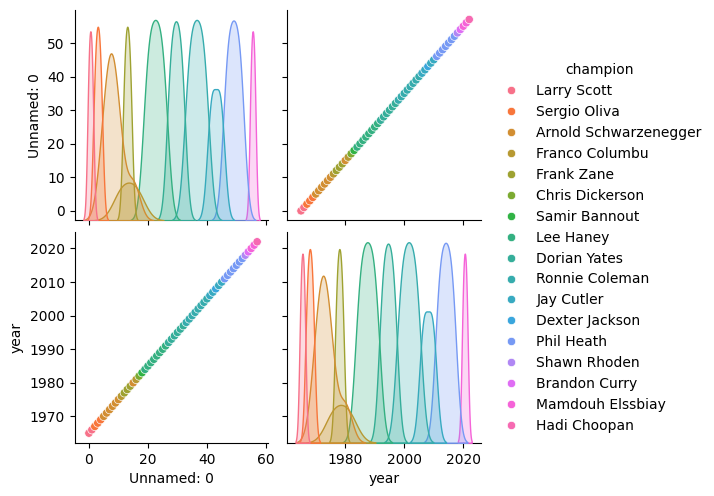

In [39]:
sns.pairplot(data, hue='champion');

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Чтение данных из файла
data_source = "./mr-olympia-champions.csv"
data = pd.read_csv(data_source)

# Преобразование категориальных признаков в числовые, например, с использованием one-hot encoding
data_encoded = pd.get_dummies(data, columns=['year', 'venue', 'represented_country_cham', 'champion',
                                             'represented_country_runn', 'runner-up', 'represented_country_thir', '3rd_place'])

# Разделение данных
X = data_encoded.drop('champion_award', axis=1)
y = data_encoded['champion_award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели k-ближайших соседей
def build_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Предсказание и оценка точности
k_value = int(input("Введите количество ближайших соседей (K): "))

knn_classifier = build_knn_classifier(X_train, y_train, k_value)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Введите количество ближайших соседей (K):  2


Точность модели: 0.75


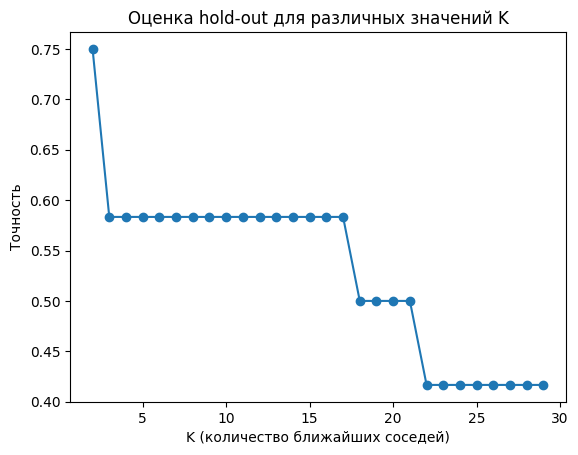

In [44]:
import matplotlib.pyplot as plt

def evaluate_holdout(X_train, y_train, X_test, y_test, k_values):
    accuracies = []

    for k in k_values:
        knn_classifier = build_knn_classifier(X_train, y_train, k)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = list(range(2, 30))

holdout_accuracies = evaluate_holdout(X_train, y_train, X_test, y_test, k_values)

plt.plot(k_values, holdout_accuracies, marker='o')
plt.title('Оценка hold-out для различных значений K')
plt.xlabel('K (количество ближайших соседей)')
plt.ylabel('Точность')
plt.show()

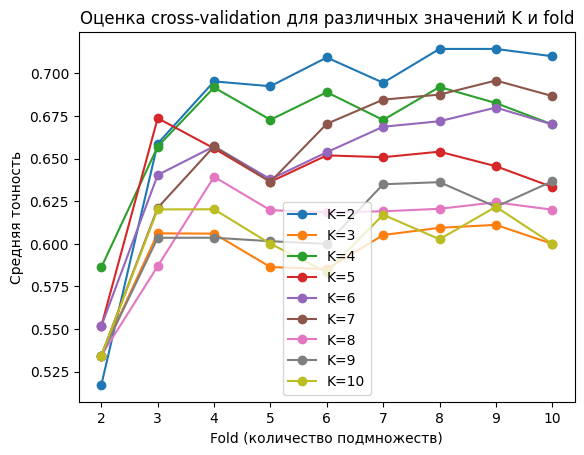


Оптимальное значение K на основе hold-out: 2
Оптимальные значения K на основе cross-validation:
Для K=2, оптимальное значение fold: 8
Для K=3, оптимальное значение fold: 9
Для K=4, оптимальное значение fold: 8
Для K=5, оптимальное значение fold: 3
Для K=6, оптимальное значение fold: 9
Для K=7, оптимальное значение fold: 9
Для K=8, оптимальное значение fold: 4
Для K=9, оптимальное значение fold: 10
Для K=10, оптимальное значение fold: 9

Наилучшее значение K: 2

Точность модели с использованием наилучшего значения K: 0.75


In [40]:
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

from sklearn.model_selection import cross_val_score


def evaluate_cross_validation(X, y, k_values, fold_values):
    results = {}

    for k in k_values:
        k_results = []
        for fold in fold_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn_classifier, X, y, cv=fold)
            k_results.append(scores.mean())

        results[k] = k_results

    return results

fold_values = list(range(2,11))

cross_validation_results = evaluate_cross_validation(X, y, k_values, fold_values)

for k, results in cross_validation_results.items():
    plt.plot(fold_values, results, label=f'K={k}', marker='o')

plt.title('Оценка cross-validation для различных значений K и fold')
plt.xlabel('Fold (количество подмножеств)')
plt.ylabel('Средняя точность')
plt.legend()
plt.show()

optimal_k_holdout = fold_values[holdout_accuracies.index(max(holdout_accuracies))]
print(f"\nОптимальное значение K на основе hold-out: {optimal_k_holdout}")

optimal_k_values = {}
for k, results in cross_validation_results.items():
    optimal_k_values[k] = fold_values[results.index(max(results))]

print("Оптимальные значения K на основе cross-validation:")
for k, optimal_k in optimal_k_values.items():
    print(f"Для K={k}, оптимальное значение fold: {optimal_k}")

best_k = max(optimal_k_values, key=lambda k: cross_validation_results[k][fold_values.index(optimal_k_values[k])])

print(f"\nНаилучшее значение K: {best_k}")

best_knn_classifier = build_knn_classifier(X_train, y_train, best_k)

y_pred_best_k = best_knn_classifier.predict(X_test)

accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f"\nТочность модели с использованием наилучшего значения K: {accuracy_best_k:.2f}")

## Контрольные вопросы

### Особенности методов метрической классификации:
- Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
- Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

### Принципы и этапы реализации метода kNN:
- Принцип: Определение класса объекта основывается на классе его соседей.
- Этапы:
    Задание количества соседей (K).
    Вычисление расстояний между объектом и всеми точками обучающей выборки.
    Выбор K ближайших соседей.
    Определение класса объекта на основе большинства классов среди соседей.
    
### Выбор количества соседей:
- Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

### Метод парзеновского окна:
- Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

### Параметры для оптимизации в методах kNN:
- k (количество соседей): Оптимизируется для достижения наилучшей производительности.
- Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.